# Histogramas en escala logarítmica

En esta notebook veremos cómo realizar correctamente el histograma de una distribución de porbabilidad sesgada utilizando un bineado logarítmico. Para ello, vamos a analizar un caso muy común en el área de redes complejas: un grafo con distribución de grado de tipo ley de potencias.

In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

plt.rc("text", usetex=True)

Generamos un grafo aleatorio utilizando el modelo de [Barabasi-Albert](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model). Este grafo presenta una distribución de grado heterogénea, que puede aproximarse como
$$
p(k) \sim k^{-\gamma},
$$
con $\gamma=3$.

Utilizando la librería igraph, podemos generar el grafo utilizando el método `Graph().Barabasi()`, el cual está documentado [acá](https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#Barabasi).

In [2]:
N = int(1e6)  # Cantidad de nodos
m = 5         # Cantidad de enlaces por nodo

# Creamos el grafo
g = ig.Graph().Barabasi(N, m)

# Extraemos la secuencia de grado
degree_seq = g.degree()

Intentamos primero graficar el histograma de la secuencia de grado empleando un bineado lineal.

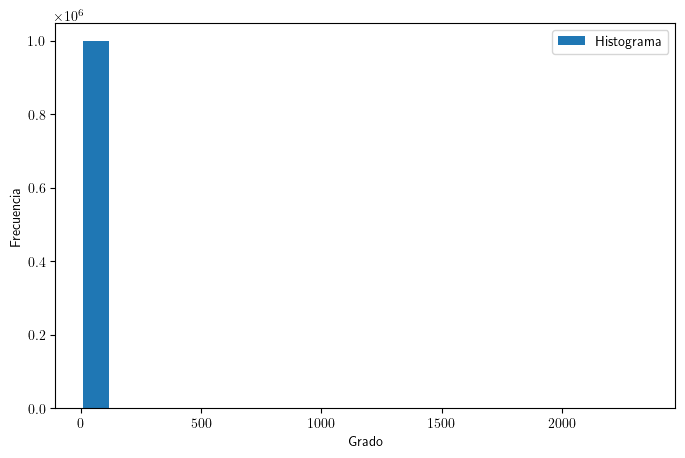

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Grado")
ax.hist(degree_seq, bins=20, rwidth=0.9, label="Histograma")
ax.legend()
plt.show()

Al utilizar este binneado, sólo podemos observar que la gran mayoría de los nodos posee un grado bajo, pero poco podemos decir de los nodos más conectados (los *hubs*).

Para observar mejor los hubs, aplicamos escala logarítmica al eje $y$.

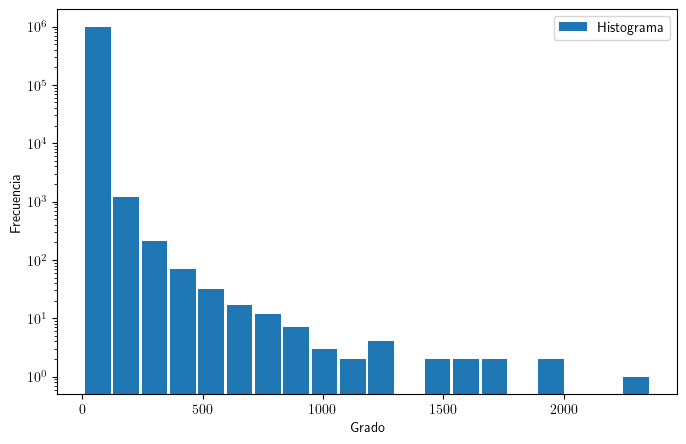

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Grado")
ax.hist(degree_seq, bins=20, rwidth=0.9, label="Histograma")
ax.legend()
plt.show()

Con esta escala podemos verificar que existe una cantidad de nodos no despreciable con grado alto. Sin embargo, aún cuesta ver si la distribución se aproxima a la expresión $p(k) \sim k^{-\gamma}$ o no.

¿Qué pasa si aplicamos escala logarítmica también al eje $x$?

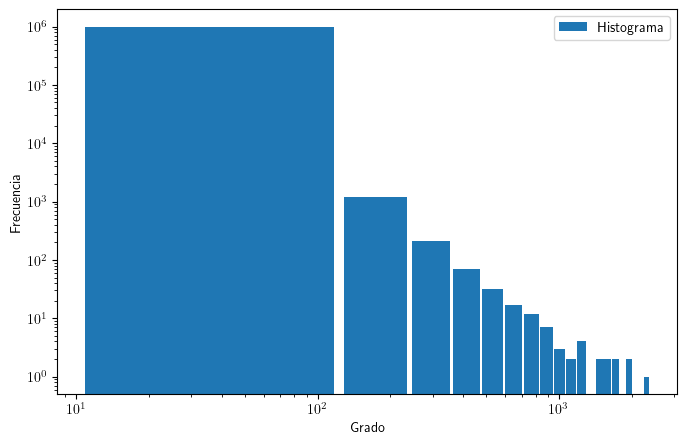

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Grado")
ax.hist(degree_seq, bins=20, rwidth=0.9, label="Histograma")
ax.legend()
plt.show()

Al aplicar la escala logarítmica, los tamaños relativos de los bines son diferentes, con lo cual el histograma no se ve muy bien. Para solucionar esto, debemos definir a mano el tamaño del binneado, utilizando para esto un espaciado logarítmico.

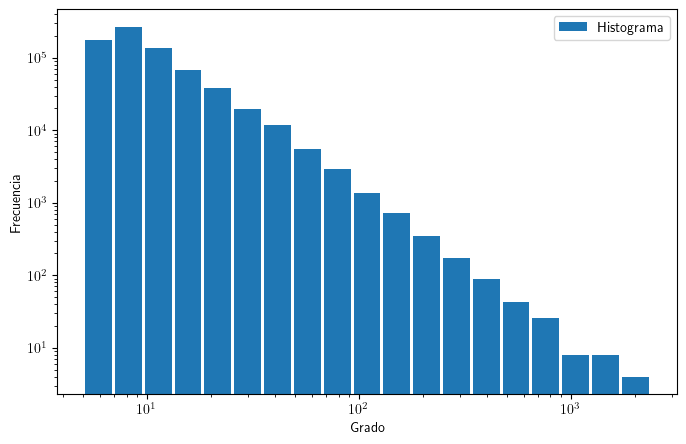

In [6]:
kmin = min(degree_seq)
kmax = max(degree_seq)
bins = np.logspace(np.log10(kmin), np.log10(kmax), 20, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Grado")
ax.hist(degree_seq, bins=bins, rwidth=0.9, label="Histograma")
ax.legend()
plt.show()

Si aplicamos logaritmo a ambos lados de la ecuación para $p(x)$ obtenemos

$$
\log p(k) = -\gamma \log k.
$$

Es decir, en escala log-log, lo que deberíamos ver es una recta con pendiente igual a $-\gamma$-

En el gráfico anterior se ve a simple vista que la frecuencia decae de manera lineal (aproximadamente) en escala log-log.
Resta ver si la pendiente es la correcta.

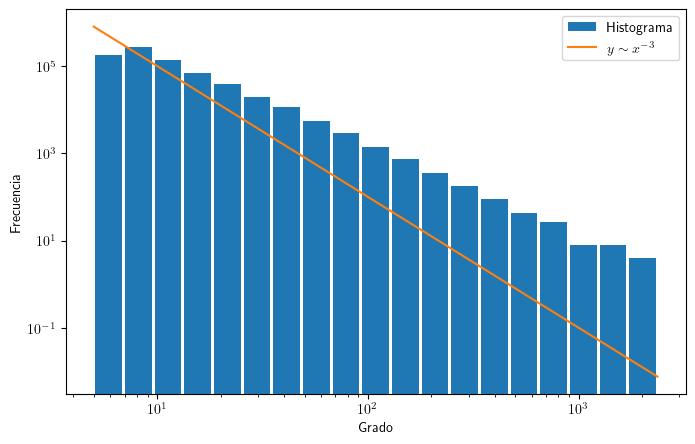

In [7]:
def powerlaw(X, a, c):
    """
    Calcula una ley de potencias $y = c x^a$.
    """
    return c * X**a

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Grado")
ax.hist(degree_seq, bins=bins, rwidth=0.9, label="Histograma")

a = -3   # Pendiente esperada para la distribución de grado
c = 1e8  # Ajustamos a mano la ordenada al origen (no es relevante en este caso)
ax.plot(bins, powerlaw(bins, a=a, c=c), "-", label=r"$y \sim x^{-3}$")
ax.legend()
plt.show()

Como podemos observar, la pendiente no coincide. Esto es un problema de normalización. Al usar bines de distinto tamaño, es necesario dividir cada bin por el ancho del mismo, algo que por defecto `plt.hist()` no hace. De no hacer esto, estaríamos dando un peso relativente mayor a los bines más anchos (los de la derecha) que a los más angostos (los de la izquierda).

Una forma práctica de resolver esto es pasar la función el parámetro `density=True`. Con este parámetro, en lugar de graficar frecuencia absoluta se grafica la frecuencia relativa, correctamente normalizada de acuerdo al ancho de cada bin.

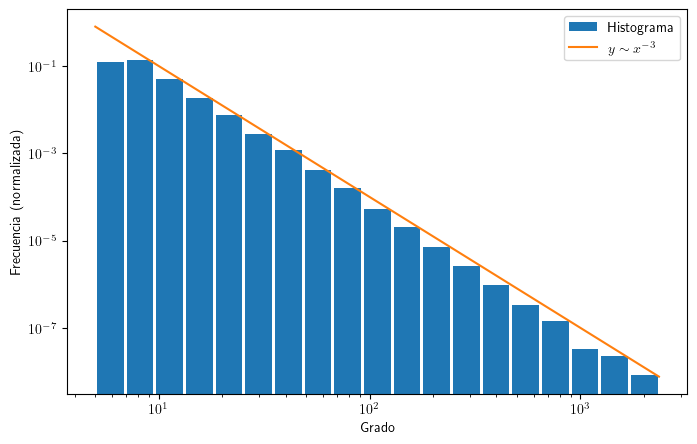

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia (normalizada)")
ax.set_xlabel("Grado")
ax.hist(degree_seq, bins=bins, density=True, rwidth=0.9, label="Histograma")

a = -3   # Pendiente esperada para la distribución de grado
c = 1e2  # Ajustamos a mano la ordenada al origen (no es relevante en este caso)
ax.plot(bins, powerlaw(bins, a=a, c=c), "-", label=r"$y \sim x^{-3}$")
ax.legend()
plt.show()

Ahora sí, podemos ver que el histograma coincide coincide con la predicción teórica.